In [13]:
!pip install ultralytics opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [14]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Helper function to display images
def show_image(img_bgr, title="Image"):
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()


In [15]:
# Load pretrained YOLOv8 model (COCO dataset)
model = YOLO('yolov8n.pt')  # you can also use 'yolov8s.pt', 'yolov8m.pt', etc.

# Display model information
model.info()


YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)

Image captured and saved as captured_image.jpg

0: 480x640 1 person, 685.7ms
Speed: 7.4ms preprocess, 685.7ms inference, 5.0ms postprocess per image at shape (1, 3, 480, 640)


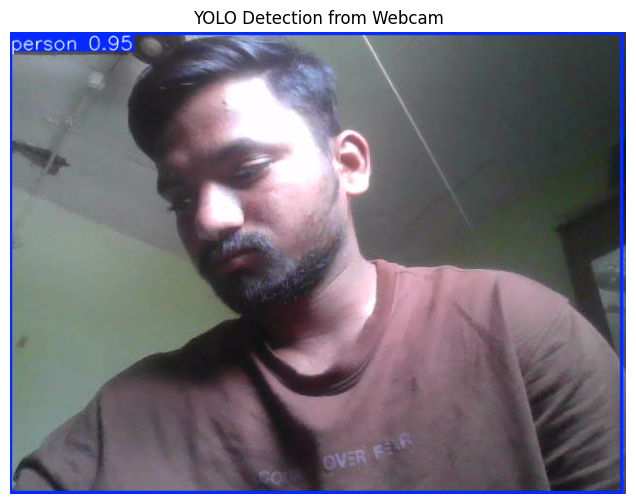

In [16]:
## 4. Capture Image from Webcam and Run Object Detection (Notebook Output)

import cv2
import matplotlib.pyplot as plt

# Open webcam
cap = cv2.VideoCapture(0)  # 0 = default webcam

ret, frame = cap.read()
cap.release()

if ret:
    # Save captured image
    cv2.imwrite("captured_image.jpg", frame)
    print("Image captured and saved as captured_image.jpg")

    # Run YOLO detection
    results = model(frame)

    # Get annotated frame
    annotated_frame = results[0].plot()

    # Convert BGR → RGB for matplotlib
    annotated_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

    # Show result inside notebook
    plt.figure(figsize=(8,6))
    plt.imshow(annotated_rgb)
    plt.axis("off")
    plt.title("YOLO Detection from Webcam")
    plt.show()
else:
    print("Failed to capture image")
